# Modified Class Assignment
## Machine Learning Foundations with Python @ Carnegie Mellon University (Spring 2024)
### Name: Samantha Archie

### Data Description

Data used in this notebook is from https://www.kaggle.com/datasets/contactprad/bike-share-daily-data

Variables included in the dataset:

* `instant`: record index
* `dteday`: date
* `season`: season (1-winter, 2-spring, 3-summer, 4-fall)
* `yr`: year (0:2011, 1:2012)
* `mnth`: month (1-January to 12-December)
* `holiday`: weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
* `weekday`: day of the week (0-Monday to 6-Sunday)
* `workingday`: if day is neither weekend nor holiday is 1, otherwise is 0.
* `weathersit`:
   - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
   - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
   - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
   - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* `temp`: Normalized temperature in Celsius. The values are divided to 41 (max)
* `atemp`: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
* `hum`: Normalized humidity. The values are divided to 100 (max)
* `windspeed`: Normalized wind speed. The values are divided to 67 (max)
* `casual`: count of casual users
* `registered`: count of registered users
* `cnt`: count of total rental bikes including both casual and registered

### Import Libraries & Settings

In [42]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV 
import time

# Settings
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

### 1) Import and clean data

#### Load data from Kaggle

In [43]:
hourly = pd.read_csv("/Users/samanthaarchie/Library/CloudStorage/Dropbox/Jobs/Tasks/Code Samples/bike_sharing_hourly.csv")
hourly.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Review data

In [44]:
hourly.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Check for missing values

In [45]:
# check for nulls
print(hourly.shape)
print(hourly.isnull().sum())
print(hourly.isnull().any(axis=1).sum())
hourly[hourly.isnull().any(axis=1)]

(17379, 17)
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
0


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


#### Check for and remove outliers in the target variable 'cnt'

In [46]:
# Checking ouliers in Target varibale "cnt".
Q1 = hourly['cnt'].quantile(0.25)
Q3 = hourly['cnt'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = hourly[(hourly['cnt'] < lower_bound) | (hourly['cnt'] > upper_bound)]
#outliers

In [47]:
# Remove outliers
bikeshare = hourly[(hourly['cnt'] >= lower_bound) & (hourly['cnt'] <= upper_bound)]
print("Shape after outlier removal:",bikeshare.shape)

Shape after outlier removal: (16874, 17)


#### Plots

<Axes: xlabel='cnt', ylabel='Count'>

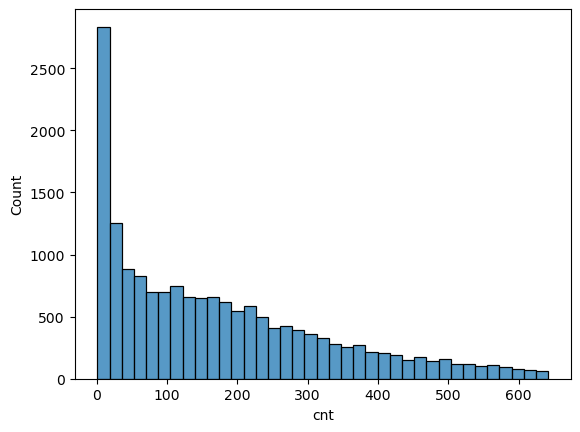

In [48]:
sns.histplot(data=bikeshare,x='cnt')

<Axes: xlabel='hr', ylabel='cnt'>

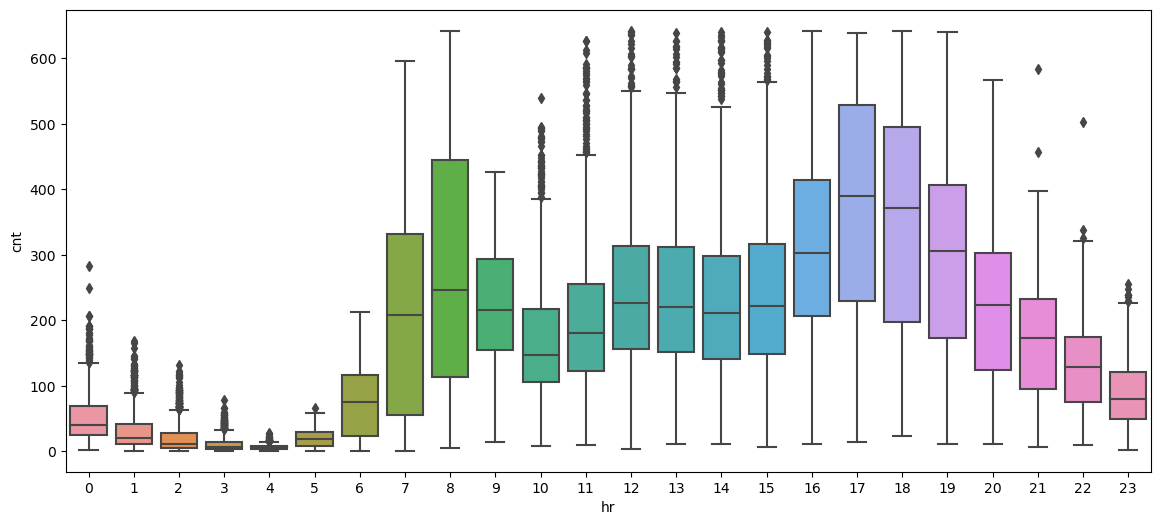

In [49]:
plt.figure(figsize=(14,6))
sns.boxplot(data=bikeshare,x='hr',y='cnt')

##### Plot interpretation
Fewer bikes are rented at night and the most bikes are rented during commuting times (7-9am and 5-8pm)

[Text(0, 0, 'Jan'),
 Text(1, 0, 'Feb'),
 Text(2, 0, 'Mar'),
 Text(3, 0, 'Apr'),
 Text(4, 0, 'May'),
 Text(5, 0, 'Jun'),
 Text(6, 0, 'Jul'),
 Text(7, 0, 'Aug'),
 Text(8, 0, 'Sep'),
 Text(9, 0, 'Oct'),
 Text(10, 0, 'Nov'),
 Text(11, 0, 'Dec')]

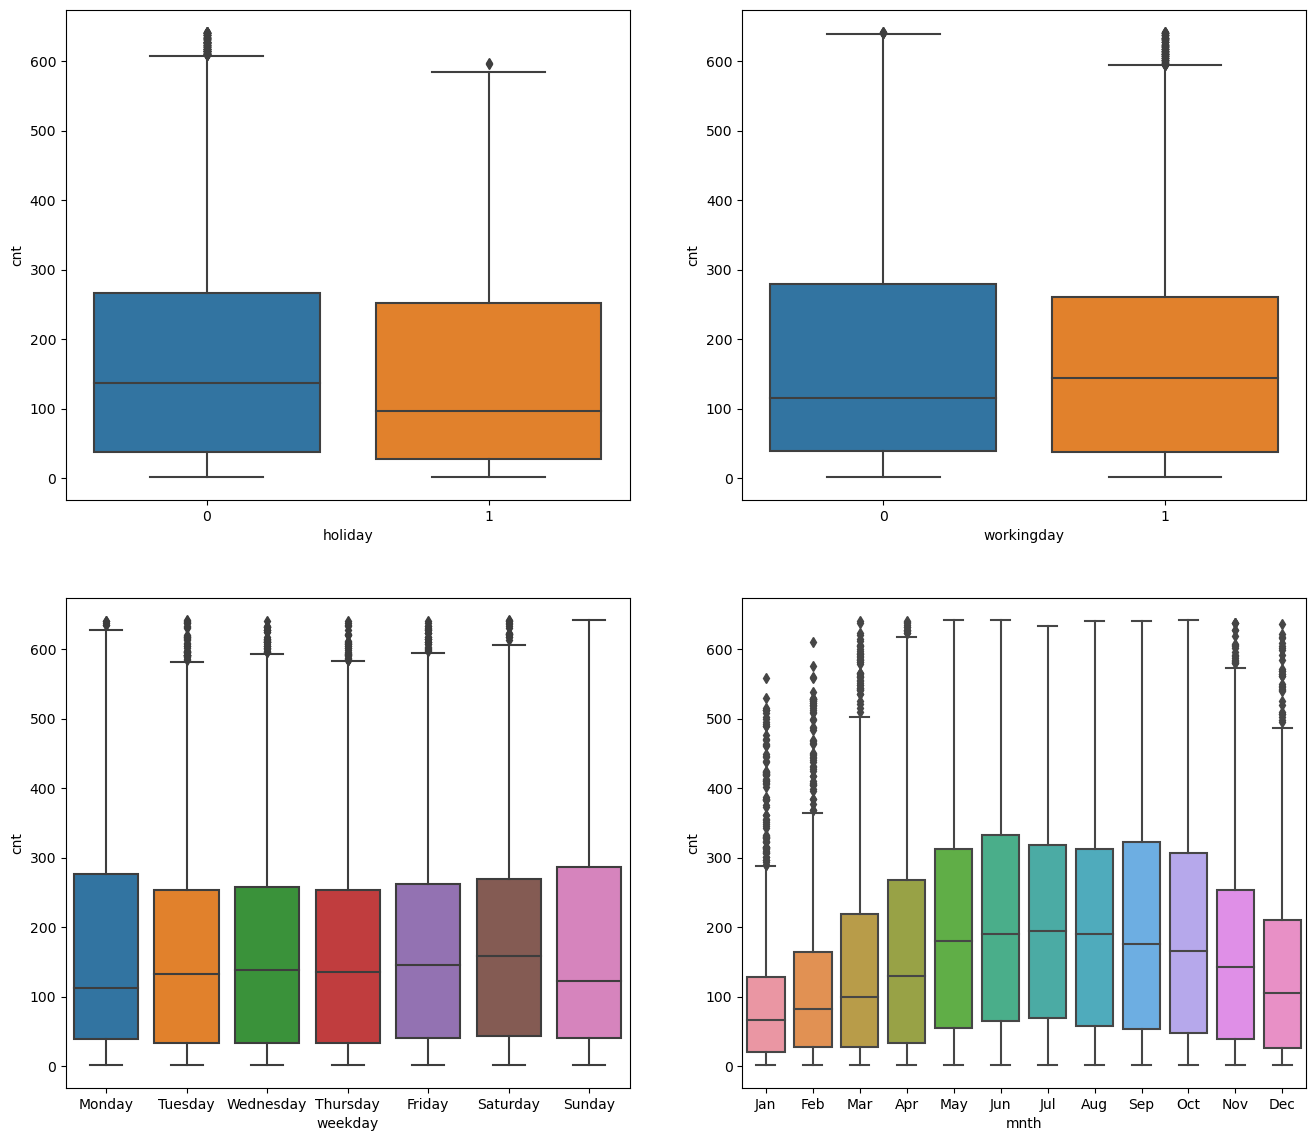

In [50]:
# Creating subplots with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(16,14))

# Plot 1: Count per hour vs Holiday
sns.boxplot(data=bikeshare, x='holiday', y='cnt', ax=axes[0,0])

# Plot 2: Count per hour vs Working Day
sns.boxplot(data=bikeshare, x='workingday', y='cnt', ax=axes[0,1])

# Plot 3: Count per hour vs Weekday
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_plt = sns.boxplot(data=bikeshare, x='weekday', y='cnt', ax=axes[1,0])
weekday_plt.set_xticklabels(days)

# Plot 4: Count per hour vs Month
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_plt = sns.boxplot(data=bikeshare, x='mnth', y='cnt', ax=axes[1,1])
month_plt.set_xticklabels(months)

##### Plot interpretation
- Holidays: More outliers on non-holidays, IQR is larger for holidays
- Working days: larger IQR for non-working days, more outliers and smaller IQR for working days
- Weekdays: Pretty consistent ridership across days
- Months: Winter has the fewest people riding bikes, summer and fall are the highest

#### Encode categorical variables

In [51]:
# Encode variables
bikeshare = pd.get_dummies(bikeshare, columns=['season'], dtype=int, drop_first=True)
bikeshare = pd.get_dummies(bikeshare, columns=['weathersit'], dtype=int, drop_first=True)
bikeshare = pd.get_dummies(bikeshare, columns=['mnth'], dtype=int, drop_first=True)
bikeshare = pd.get_dummies(bikeshare, columns=['weekday'], dtype=int, drop_first=True)

# Turn hours into 3 hour dummy variables
bikeshare = pd.get_dummies(bikeshare, columns=['hr'], dtype=int, drop_first=True)
# Drop hours 1 and 2 because they will be combined with the hour 0 variable as a control
bikeshare = bikeshare.drop(columns=['hr_1','hr_2'])
# Group other variables
bikeshare['hrs_35'] = bikeshare[['hr_3','hr_4','hr_5']].sum(axis=1)
bikeshare['hrs_68'] = bikeshare[['hr_6','hr_7','hr_8']].sum(axis=1)
bikeshare['hrs_911'] = bikeshare[['hr_9','hr_10','hr_11']].sum(axis=1)
bikeshare['hrs_1214'] = bikeshare[['hr_12','hr_13','hr_14']].sum(axis=1)
bikeshare['hrs_1517'] = bikeshare[['hr_15','hr_16','hr_17']].sum(axis=1)
bikeshare['hrs_1820'] = bikeshare[['hr_18','hr_19','hr_20']].sum(axis=1)
bikeshare['hrs_2123'] = bikeshare[['hr_21','hr_22','hr_23']].sum(axis=1)
# Drop old single hour variables
bikeshare = bikeshare.drop(columns=['hr_3','hr_4','hr_5','hr_6','hr_7','hr_8','hr_9','hr_10','hr_11','hr_12','hr_13','hr_14','hr_15','hr_16','hr_17','hr_18','hr_19','hr_20','hr_21','hr_22','hr_23'])

# Print the number of columns in the modified 'bikeShare' dataset and display the first few rows
print(bikeshare.shape)
print(bikeshare.columns)
bikeshare.head(5)

(16874, 42)
Index(['instant', 'dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'cnt', 'season_2',
       'season_3', 'season_4', 'weathersit_2', 'weathersit_3', 'weathersit_4',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'hrs_35', 'hrs_68',
       'hrs_911', 'hrs_1214', 'hrs_1517', 'hrs_1820', 'hrs_2123'],
      dtype='object')


,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3,weathersit_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,hrs_35,hrs_68,hrs_911,hrs_1214,hrs_1517,hrs_1820,hrs_2123
0,1,2011-01-01,0,0,0,0.24,0.2879,0.81,0.0,3,13,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2,2011-01-01,0,0,0,0.22,0.2727,0.80,0.0,8,32,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,2011-01-01,0,0,0,0.22,0.2727,0.80,0.0,5,27,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,4,2011-01-01,0,0,0,0.24,0.2879,0.75,0.0,3,10,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
4,5,2011-01-01,0,0,0,0.24,0.2879,0.75,0.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0


#### Make heat map to check for colinearity

<Axes: >

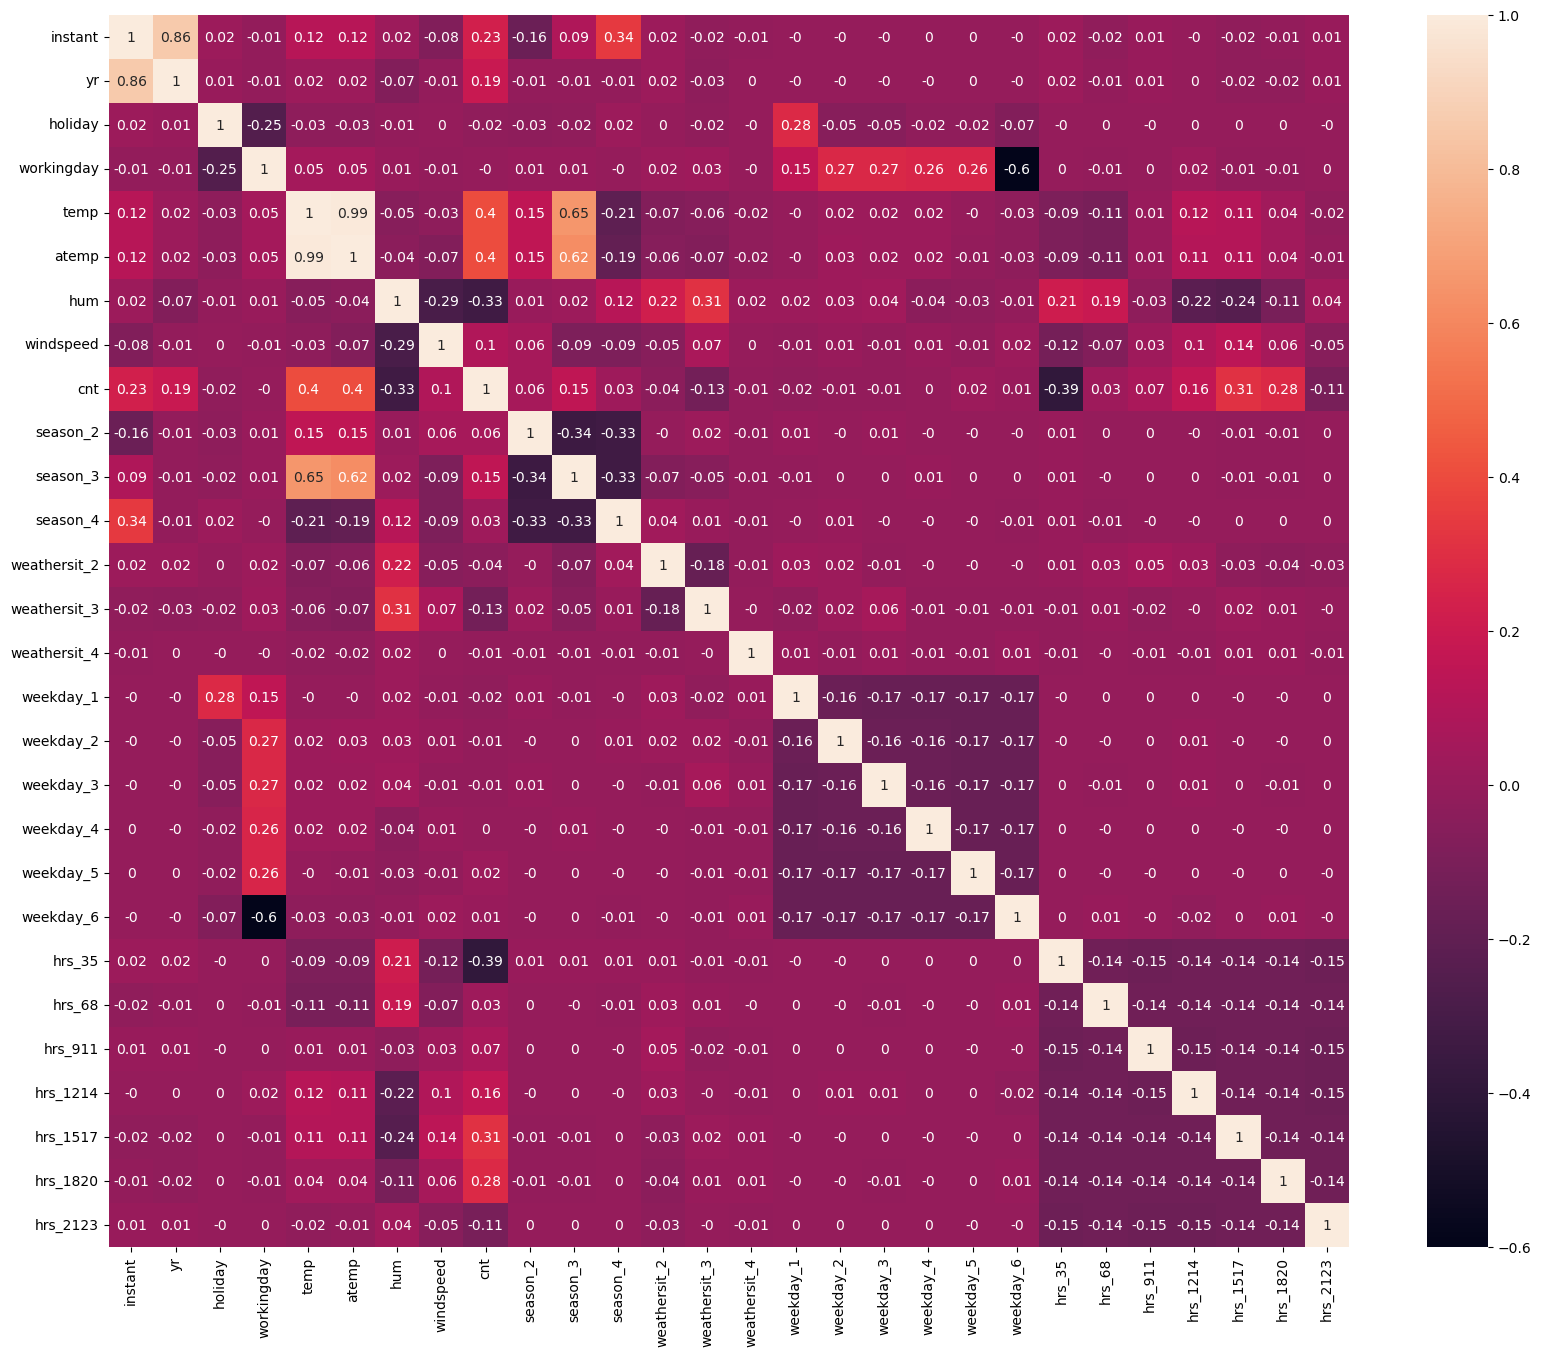

In [52]:
# Removing date since it won't work in heatmap
bikeshare_corr = bikeshare.drop(columns=['dteday','casual','registered'])

# Dropped month variables because they overlap with seasons and they were all negative in the original model
bikeshare_corr = bikeshare_corr.loc[:,~bikeshare_corr.columns.str.startswith('mnth')]

# Plotting heatmap
corr = bikeshare_corr.corr().round(2)
plt.figure(figsize=(20,16))
sns.heatmap(data=corr, annot=True)

In [53]:
# Drop any highly correlated variable
bikeshare.drop(columns=['atemp','yr','dteday','casual','registered'], inplace=True)
bikeshare = bikeshare.loc[:,~bikeshare.columns.str.startswith('mnth')]
bikeshare.head(5)

,instant,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3,weathersit_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,hrs_35,hrs_68,hrs_911,hrs_1214,hrs_1517,hrs_1820,hrs_2123
0,1,0,0,0.24,0.81,0.0,16,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2,0,0,0.22,0.80,0.0,40,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,0,0,0.22,0.80,0.0,32,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,4,0,0,0.24,0.75,0.0,13,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
4,5,0,0,0.24,0.75,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0


Dropped atmospheric temperature because it is highly correlated with the id variable (instant).
Dropped registered and casual for this exercise since they are correlated with cnt (which is the sum of the two). These variables could be used in a classification model.
Dropped month variables because they were all negative in the model, which didn't make sense and they overlap with seasons, and to make it easier to interpret

Split data into `X_train`, `X_test`, `y_train` and `y_test`

In [54]:
# Create X and y datasets
X = bikeshare.drop('cnt',axis=1)
y = bikeshare['cnt']

# Split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=3,test_size=.2)

---

### 2) Linear model

In [55]:
# Step 1: Pick the model type by initializing a model object
linear = LinearRegression()

# Step 2: Train the model by passing some data
linear.fit(X_train,y_train)

# Step 3: Get predictions
y_pred_train = linear.predict(X_train)
y_pred_test = linear.predict(X_test)

# Step 4: Evaluate the model performance
r_squared_train_linear = linear.score(X_train,y_train)
r_squared_test_linear = linear.score(X_test,y_test)
mse_train_linear = mean_squared_error(y_pred_train,y_train)
mse_test_linear = mean_squared_error(y_pred_test,y_test)

# Printing results for training
print("Train R^2: ",r_squared_train_linear)
print("Train MSE: ",mse_train_linear)

# Printing results for testing
print("Test R^2: ",r_squared_test_linear)
print("Test MSE: ",mse_test_linear)

Train R^2:  0.5883855247296819
Train MSE:  9854.984603066683
Test R^2:  0.5800493736256895
Test MSE:  10238.076053032999


#### Describe the model fit
The R^2 values are low and the MSEs are high, which indicates this model is not the best for prediction. The R^2 and MSE values for the test and train data are very similar indicating it is generalizing to test data well and not overfitting.

#### Create a table with the model coefficients

In [56]:
coef_dict = {}
for c, feat in zip(X_train.columns.values, linear.coef_):
    coef_dict[c] = feat
coef = pd.DataFrame.from_dict(data=coef_dict,orient='index')
coef.reset_index(inplace=True)
coef.rename(columns={'index':'Feature',0:'LM_Coefficient'}, inplace=True)
coef.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
Feature,instant,holiday,workingday,temp,hum,windspeed,season_2,season_3,season_4,weathersit_2,weathersit_3,weathersit_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,hrs_35,hrs_68,hrs_911,hrs_1214,hrs_1517,hrs_1820,hrs_2123
LM_Coefficient,0.00636,-17.245746,3.243294,223.967255,-73.905521,-24.406637,27.900126,-0.908803,21.424622,-8.053249,-57.790616,-23.303725,-4.463787,-5.155902,-6.267928,-2.885158,4.770323,8.945434,-18.398691,158.93323,150.961135,171.352101,237.439393,234.347372,85.491927


##### Key findings
**On average, holding all other variables constant,**
- Holiday: 17 fewer bikes per hour on holidays compared to non-holidays
- Working day: 3 more bikes per hour on working days compared to non-working days
- Temperature: 1 degree increase ~ 224 more bikes per hour
- Humidity: 1 unit increase ~ 74 fewer bikes per hour
- Windspeed: 1 unit increase ~ 24 fewer bikes per hour
- Spring: 28 more bikes per hour compared to winter
- Summer: 1 fewer bikes per hour compared to winter
- Fall: 21 more bikes per hour compared to winter
- Misty/cloudy weather: 8 fewer bikes per hour compared to clear weather
- Light snow/rain: 58 fewer bikes per hour compared to clear weather
- Heavy snow/rain: 23 fewer bikes per hour compared to clear weather
- Monday: 4 fewer bikes per hour compared to Sunday
- Tuesday: 5 fewer bikes per hour compared to Sunday
- Wednesday: 6 fewer bikes per hour compared to Sunday
- Thursday: 3 fewer bikes per hour compared to Sunday
- Friday: 5 more bikes per hour compared to Sunday
- Saturday: 9 more bikes per hour compared to Sunday
- 3-5am: 19 fewer riders compared to 12-2am
- 6-8am: 159 more riders compared to 12-2am
- 9-11am: 151 more riders compared to 12-2am
- 12-2pm: 171 more riders compared to 12-2am
- 3-5pm: 237 more riders compared to 12-2am
- 6-8pm: 234 more riders compared to 12-2am
- 9-11pm: 85 more riders compared to 12-2am

### 3) Polynomial model

In [57]:
# Train polynomial regression models (degree 2 and 3) and evaluate using KFold.
r_squared_train_poly = []
r_squared_test_poly = []
mse_train_poly = []
mse_test_poly = []

# Iterate for degree 1 to 3
for i in range(1,4):

    # Step 0: Pre-process the features by converting them into a polynomial format
    polynomial_features = PolynomialFeatures(degree=i,include_bias=False)
    X_train_poly = polynomial_features.fit_transform(X_train)
    X_test_poly = polynomial_features.transform(X_test)

    # Step 1: Pick the model
    model_poly = LinearRegression()

    # Step 2: Train the model
    model_poly.fit(X_train_poly,y_train)

    # Step 3: Get predictions
    y_pred_train = model_poly.predict(X_train_poly)
    y_pred_test = model_poly.predict(X_test_poly)

    # Step 4: Get metrics
    r_squared_train = model_poly.score(X_train_poly,y_train)
    r_squared_test = model_poly.score(X_test_poly,y_test)
    mse_train = mean_squared_error(y_pred_train,y_train)
    mse_test = mean_squared_error(y_pred_test,y_test)

    # Step 5: Append the results
    r_squared_train_poly.append(r_squared_train)
    r_squared_test_poly.append(r_squared_test)
    mse_train_poly.append(mse_train)
    mse_test_poly.append(mse_test)

# Iterate over the results and print them
for i, (rs_tr,rs_te,mse_tr,mse_te) in enumerate(zip(r_squared_train_poly,r_squared_test_poly,mse_train_poly,mse_test_poly)):
    print(f"Results for Polynomial Degree {i+1}:")
    print(f"  R-squared (Train): {rs_tr:.4f}")
    print(f"  R-squared (Test): {rs_te:.4f}")
    print(f"  MSE (Train): {mse_tr:.4f}")
    print(f"  MSE (Test): {mse_te:.4f}")
    print()

r_squared_test_poly3 = r_squared_test_poly[2]
mse_test_poly3 = mse_test_poly[2]

Results for Polynomial Degree 1:
  R-squared (Train): 0.5884
  R-squared (Test): 0.5800
  MSE (Train): 9854.9846
  MSE (Test): 10238.0761

Results for Polynomial Degree 2:
  R-squared (Train): 0.7611
  R-squared (Test): 0.7430
  MSE (Train): 5719.2804
  MSE (Test): 6266.5293

Results for Polynomial Degree 3:
  R-squared (Train): 0.8073
  R-squared (Test): 0.7541
  MSE (Train): 4613.0272
  MSE (Test): 5994.2733



#### Are any of the MSEs or $R^2$ better than a Linear Regression? What can you comment on the results between the Train and Test MSEs?
The R2 values are higher and the MSE values are lower for the polynomial degree 2 and 3 models compared to the linear one. Therefore, they outperform the linear regression model. However, the train and test MSEs are getting further apart, which may indicate overfitting. The test MSEs for degree 2 vs. 3 are very similar and there is a larger difference in the training data, which supports the conclusion that the model may be overfitting to the train data.

### Cross-validation for linear and polynomial models

**Re-calculate initial linear regression and best polynomial regression using cross-validation (`cross_val_score`) to get the $R^2$ and MSE. Save the MSE and R squared in each case.**

In [58]:
# Step 1: Pick the model
model = LinearRegression()

# Step 2: Train the model
model = model.fit(X_train, y_train)

# Step 3: Evaluate the model using cross_val_score
cross_val_r_squared_linear = np.mean(cross_val_score(model, X_train, y_train, cv=10))
cross_val_mse_linear = -np.mean(cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=10))

print(f"Results for Linear:")
print(f"  R-squared (Train): {cross_val_r_squared_linear:.4f}")
print(f"  Average Cross-Validation MSE: {cross_val_mse_linear:.4f}")
print()

Results for Linear:
  R-squared (Train): 0.5864
  Average Cross-Validation MSE: 9890.6371



In [59]:
# Step 0: Pre-process the features by converting them into a polynomial format
polynomial_features = PolynomialFeatures(degree=3)
X_train_polynomial = polynomial_features.fit_transform(X_train)

# Step 1: Pick the model
model_poly = LinearRegression()

# Step 2: Train the model
model_poly = model_poly.fit(X_train_polynomial, y_train)

# Step 3: Evaluate the model using cross_val_score
cross_val_r_squared_poly  = np.mean(cross_val_score(model, X_train_polynomial, y_train, cv=10))
cross_val_mse_poly = -np.mean(cross_val_score(model_poly, X_train_polynomial, y_train, scoring="neg_mean_squared_error", cv=10))

print(f"Results for Polynomial Degree 3:")
print(f"  R-squared (Train): {cross_val_r_squared_poly:.4f}")
print(f"  Average Cross-Validation MSE: {cross_val_mse_poly:.4f}")

Results for Polynomial Degree 3:
  R-squared (Train): 0.7528
  Average Cross-Validation MSE: 5911.1315


**Extracting the coefficients to compare with other models**
- Only selecting degree 3 since it is the best fit

In [60]:
# Extracting the values of coefficients at the best alpha and adding to df
poly3_dict = {}
for c,feat in zip(X_train.columns.values, model_poly.coef_):
    poly3_dict[c] = feat
poly3 = pd.DataFrame.from_dict(data=poly3_dict,orient='index')
poly3.reset_index(inplace=True)
poly3.rename(columns={'index':'Feature',0:'Polynomial_D3_Coefficient'}, inplace=True)
coef = coef.join(poly3.set_index('Feature'),on='Feature')
coef

,Feature,LM_Coefficient,Polynomial_D3_Coefficient
0,instant,0.006360,-66.787405
1,holiday,-17.245746,-0.020823
2,workingday,3.243294,29.857059
3,temp,223.967255,3.590476
4,hum,-73.905521,-349.978331
5,windspeed,-24.406637,-711.631247
6,season_2,27.900126,69.143841
7,season_3,-0.908803,-64.689069
8,season_4,21.424622,40.570963
9,weathersit_2,-8.053249,93.862135


---

### 3) Regularized Regression

#### Standardize the data

**Why?**
Standardization is needed for ridge (and lasso) regressions because you want the features to be evaluated on the same scale. Regularized regression models will penalize features with large variances more than those with smaller variances. An example is if height were measured in inches vs. feet. The feet coefficient would be larger than the inches coefficient. The models work best when data is standardized.

In [19]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Ridge regression model

In [20]:
# Test multiple alpha values

# Getting 100 values on a logarithmic scale
alphas = np.logspace(-5, 5, 100)

# Create a list where you will store the information
coefs_ridge = []
mses_train_ridge = []
mses_test_ridge = []

# Pick the model type by initializing a model object
model_ridge = Ridge()

# Try each set of alphas in your Ridge model
for a in alphas:

    # Step 1: Set the alpha from the list as a model parameter
    model_ridge.set_params(alpha=a)

    # Step 2: Train the model by passing some data. Again, make sure to pass pre-processed X_train and X_test
    model_ridge.fit(X_train_scaled,y_train)

    # Step 3: Get predictions
    y_pred_train_ridge = model_ridge.predict(X_train_scaled)
    y_pred_test_ridge = model_ridge.predict(X_test_scaled)

    # Step 4: Evaluate the model performance
    mse_train_ridge = -np.mean(cross_val_score(model_ridge, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=10))
    mse_test_ridge = -np.mean(cross_val_score(model_ridge, X_test_scaled, y_test, scoring="neg_mean_squared_error", cv=10))

    # Append all results to the lists so we could look at them and also plot them
    coefs_ridge.append(model_ridge.coef_)
    mses_train_ridge.append(np.mean(mse_train_ridge))
    mses_test_ridge.append(np.mean(mse_test_ridge))
    
# Find the lowest value of MSE test values
min_mse_test_ridge = np.min(mses_test_ridge)
print("Min MSE train: ", min_mse_test_ridge)

# Find the index of the lowest MSE test value 
min_mse_test_ridge_index = np.argmin(mses_test_ridge)
print("Index of Min MSE test: ", min_mse_test_ridge_index)

# Call alphas with the index of the lowest MSE test value
best_alpha_ridge = alphas[min_mse_test_ridge_index]
print("Best alpha: ", best_alpha_ridge)

Min MSE train:  10309.692269306144
Index of Min MSE test:  55
Best alpha:  3.593813663804626


In [21]:
# Running Ridge model with best alpha

# Step 1: Pick the model type by initializing a model object and set the alpha to the best alpha
model_ridge_best_alpha = Ridge()
model_ridge_best_alpha.set_params(alpha=best_alpha_ridge)

# Step 2: Train the model by passing some data
model_ridge_best_alpha.fit(X_train_scaled,y_train)

# Step 3: Get predictions
y_pred_train_ridge_best_alpha = model_ridge_best_alpha.predict(X_train_scaled)
y_pred_test_ridge_best_alpha = model_ridge_best_alpha.predict(X_test_scaled)

# Step 4: Evaluate the model performance
r_squared_train_ridge_best_alpha = model_ridge_best_alpha.score(X_train_scaled,y_train)
r_squared_test_ridge_best_alpha = model_ridge_best_alpha.score(X_test_scaled,y_test)
mse_train_ridge_best_alpha = mean_squared_error(y_pred_train_ridge_best_alpha,y_train)
mse_test_ridge_best_alpha = mean_squared_error(y_pred_test_ridge_best_alpha,y_test)

print("Best Ridge Train R^2: ", r_squared_train_ridge_best_alpha)
print("Best Ridge Test R^2: ", r_squared_test_ridge_best_alpha)
print("Best Ridge Train MSE: ", mse_train_ridge_best_alpha)
print("Best Ridge Test MSE: ", mse_test_ridge_best_alpha)

# Extracting the values of coefficients at the best alpha and adding to df
ridge_dict = {}
for c,feat in zip(X_train.columns.values, model_ridge_best_alpha.coef_):
    ridge_dict[c] = feat
ridge = pd.DataFrame.from_dict(data=ridge_dict,orient='index')
ridge.reset_index(inplace=True)
ridge.rename(columns={'index':'Feature',0:'Ridge_Coefficient'}, inplace=True)
coef = coef.join(ridge.set_index('Feature'),on='Feature')

# Displaying results
coef

Best Ridge Train R^2:  0.5883851644419434
Best Ridge Test R^2:  0.5800542613563262
Best Ridge Train MSE:  9854.993229172733
Best Ridge Test MSE:  10237.956893887034


,Feature,LM_Coefficient,Ridge_Coefficient
0,instant,0.006360,31.786984
1,holiday,-17.245746,-3.314820
2,workingday,3.243294,0.480437
3,temp,223.967255,43.088693
4,hum,-73.905521,-14.245719
5,windspeed,-24.406637,-2.988797
6,season_2,27.900126,12.095025
7,season_3,-0.908803,-0.393757
8,season_4,21.424622,9.200635
9,weathersit_2,-8.053249,-3.539400


**Analysis:**
The coefficients are closer to zero (for positive coefficients the values are smaller, for negative coefficients the values are larger) in Ridge, which makes sense as Ridge penalizes large (in magnitude or the absolute value) coefficients to prevent overfitting.

**Plot two graphs: coefficients vs alphas, and CV MSE vs alphas. In the second graph find the lowest CV MSE and draw a vertical line on the graph to indicate the alpha that corresponds to this value.**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


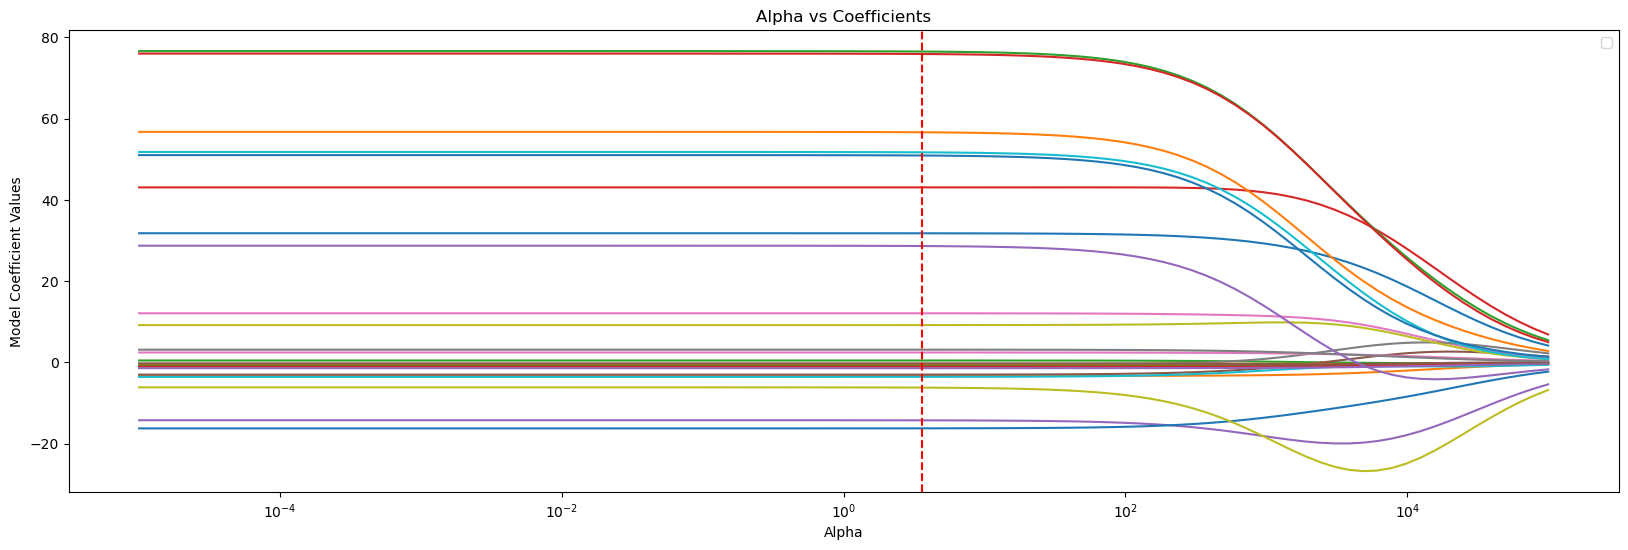

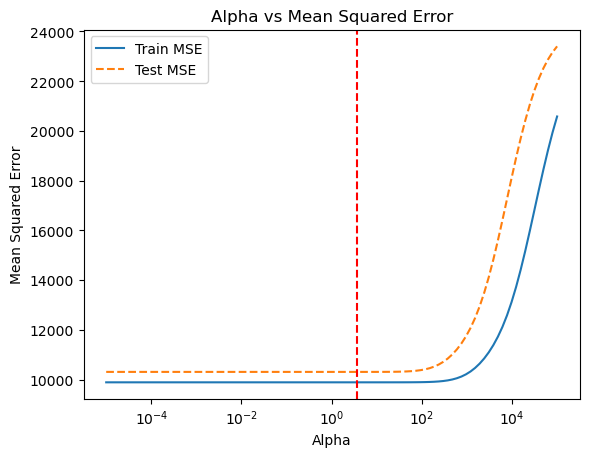

In [22]:
plt.figure(figsize=(20, 6))

# Plot alphas vs model_coefficients
for i in range(X_train_scaled.shape[1]):
    plt.plot(alphas, [coef[i] for coef in coefs_ridge])
plt.xscale('log')
plt.axvline(x=best_alpha_ridge, color='r', linestyle='--')
plt.xlabel('Alpha')
plt.ylabel('Model Coefficient Values')
plt.title('Alpha vs Coefficients')
plt.legend()
plt.show()

# Plot alphas vs MSE train and test
plt.plot(alphas, mses_train_ridge, linestyle="-",label='Train MSE')
plt.plot(alphas, mses_test_ridge, linestyle="--",label='Test MSE')
plt.axvline(x=best_alpha_ridge, color='r', linestyle='--')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Alpha vs Mean Squared Error')
plt.legend()
plt.show()

**Repeat Ridge regression, but using `RidgeCV`, and print out the best alpha for this model.**

In [23]:
# Pick the model type by initializing a model object
ridgeCV = RidgeCV(alphas=alphas, cv=10)

# Step 2: Run the cross-validation model
ridgeCV.fit(X_train_scaled, y_train)

y_pred_train_ridgeCV = ridgeCV.predict(X_train_scaled)
y_pred_test_ridgeCV = ridgeCV.predict(X_test_scaled)

r_squared_train_ridgeCV = ridgeCV.score(X_train_scaled,y_train)
r_squared_test_ridgeCV = ridgeCV.score(X_test_scaled,y_test)
mse_train_ridgeCV = mean_squared_error(y_pred_train_ridgeCV,y_train)
mse_test_ridgeCV = mean_squared_error(y_pred_test_ridgeCV,y_test)

# Printing results
print("Best alpha values: ", ridgeCV.alpha_)
print("Best RidgeCV Train R^2: ", r_squared_train_ridgeCV)
print("Best RidgeCV Test R^2: ", r_squared_test_ridgeCV)
print("Best RidgeCV Train MSE: ",mse_train_ridgeCV)
print("Best RidgeCV Test MSE: ", mse_test_ridgeCV)

Best alpha values:  5.72236765935022
Best RidgeCV Train R^2:  0.5883846132607968
Best RidgeCV Test R^2:  0.5800568091498736
Best RidgeCV Train MSE:  9855.006425700161
Best RidgeCV Test MSE:  10237.894780623079


**Compare alpha values from Ridge vs. RidgeCV models**

In [24]:
print('Ridge alpha: ', best_alpha_ridge)
print('RidgeCV alpha: ', ridgeCV.alpha_)

Ridge alpha:  3.593813663804626
RidgeCV alpha:  5.72236765935022


#### Lasso regression regression model

In [25]:
# Getting 100 values on a logarithmic scale
alphas = np.logspace(-5, 5, 300)

# Create a list where you will store the information
coefs_lasso = []
mses_train_lasso = []
mses_test_lasso = []

#Pick the model type by initializing a model object 
model_lasso = Lasso(max_iter = 10000, tol=0.1)

# Try each set of alphas in your Ridge model
for a in alphas:

    # Step 1: Set the alpha from the list as a model parameter
    model_lasso.set_params(alpha=a)

    # Step 2: Train the model by passing some data. Again, make sure to pass pre-processed X_train and X_test
    model_lasso.fit(X_train_scaled,y_train)

    # Step 3: Get predictions
    y_pred_train_lasso = model_lasso.predict(X_train_scaled)
    y_pred_test_lasso = model_lasso.predict(X_test_scaled)

    # Step 4: Evaluate the model performance
    mse_train_lasso = -np.mean(cross_val_score(model_lasso, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=10))
    mse_test_lasso = -np.mean(cross_val_score(model_lasso, X_test_scaled, y_test, scoring="neg_mean_squared_error", cv=10))

    # Append all results to the lists so we could look at them and also plot them
    coefs_lasso.append(model_lasso.coef_)
    mses_train_lasso.append(mse_train_lasso)
    mses_test_lasso.append(mse_test_lasso)    
    
# Find the lowest value of MSE test values
min_mse_test_lasso = np.min(mses_test_lasso)
print("Min MSE test: ", min_mse_test_lasso)

# Find the index of the lowest MSE test value 
min_mse_test_lasso_index = np.argmin(mses_test_lasso)
print("Index of Min MSE test: ", min_mse_test_lasso_index)

# Call alphas with the index of the lowest MSE test value
best_alpha_lasso = alphas[min_mse_test_lasso_index]
print("Best alpha: ", best_alpha_lasso)

Min MSE test:  10309.527941817812
Index of Min MSE test:  100
Best alpha:  0.022104546299710218


**Compare coefficients with previous models**

In [26]:
# Running Lasso model with best alpha
# Step 1: Pick the model type by initializing a model object and set the alpha to the best alpha
model_lasso_best_alpha = Lasso()
model_lasso_best_alpha.set_params(alpha=best_alpha_ridge)

# Step 2: Train the model by passing some data
model_lasso_best_alpha.fit(X_train_scaled,y_train)

# Step 3: Get predictions
y_pred_train_lasso_best_alpha = model_lasso_best_alpha.predict(X_train_scaled)
y_pred_test_lasso_best_alpha = model_lasso_best_alpha.predict(X_test_scaled)

# Step 4: Evaluate the model performance
r_squared_train_lasso_best_alpha = model_lasso_best_alpha.score(X_train_scaled,y_train)
r_squared_test_lasso_best_alpha = model_lasso_best_alpha.score(X_test_scaled,y_test)
mse_train_lasso_best_alpha = mean_squared_error(y_pred_train_ridge_best_alpha,y_train)
mse_test_lasso_best_alpha = mean_squared_error(y_pred_test_ridge_best_alpha,y_test)

print("Best Lasso Train R^2: ", r_squared_train_lasso_best_alpha)
print("Best Lasso Test R^2: ", r_squared_test_lasso_best_alpha)
print("Best Lasso Train MSE: ", mse_train_lasso_best_alpha)
print("Best Lasso Test MSE: ", mse_test_lasso_best_alpha)

# Extracting the values of coefficients at the best alpha and adding to df
lasso_dict = {}
for c,feat in zip(X_train.columns.values, model_lasso_best_alpha.coef_):
    lasso_dict[c] = feat
lasso = pd.DataFrame.from_dict(data=lasso_dict,orient='index')
lasso.reset_index(inplace=True)
lasso.rename(columns={'index':'Feature',0:'Lasso_Coefficient'}, inplace=True)
coef = coef.join(lasso.set_index('Feature'),on='Feature')

# Displaying results
coef


Best Lasso Train R^2:  0.5685968724275322
Best Lasso Test R^2:  0.5623169346562243
Best Lasso Train MSE:  9854.993229172733
Best Lasso Test MSE:  10237.956893887034


,Feature,LM_Coefficient,Ridge_Coefficient,Lasso_Coefficient
0,instant,0.006360,31.786984,28.732540
1,holiday,-17.245746,-3.314820,-0.181281
2,workingday,3.243294,0.480437,-0.000000
3,temp,223.967255,43.088693,42.075514
4,hum,-73.905521,-14.245719,-16.406105
5,windspeed,-24.406637,-2.988797,-0.000000
6,season_2,27.900126,12.095025,6.568384
7,season_3,-0.908803,-0.393757,-0.000000
8,season_4,21.424622,9.200635,4.977306
9,weathersit_2,-8.053249,-3.539400,-0.000000


**Plot two graphs: coefficients vs alphas, and CV MSE vs alphas. In the second graph find the lowest CV MSE and draw a vertical line on the graph to indicate the alpha that corresponds to this value.**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


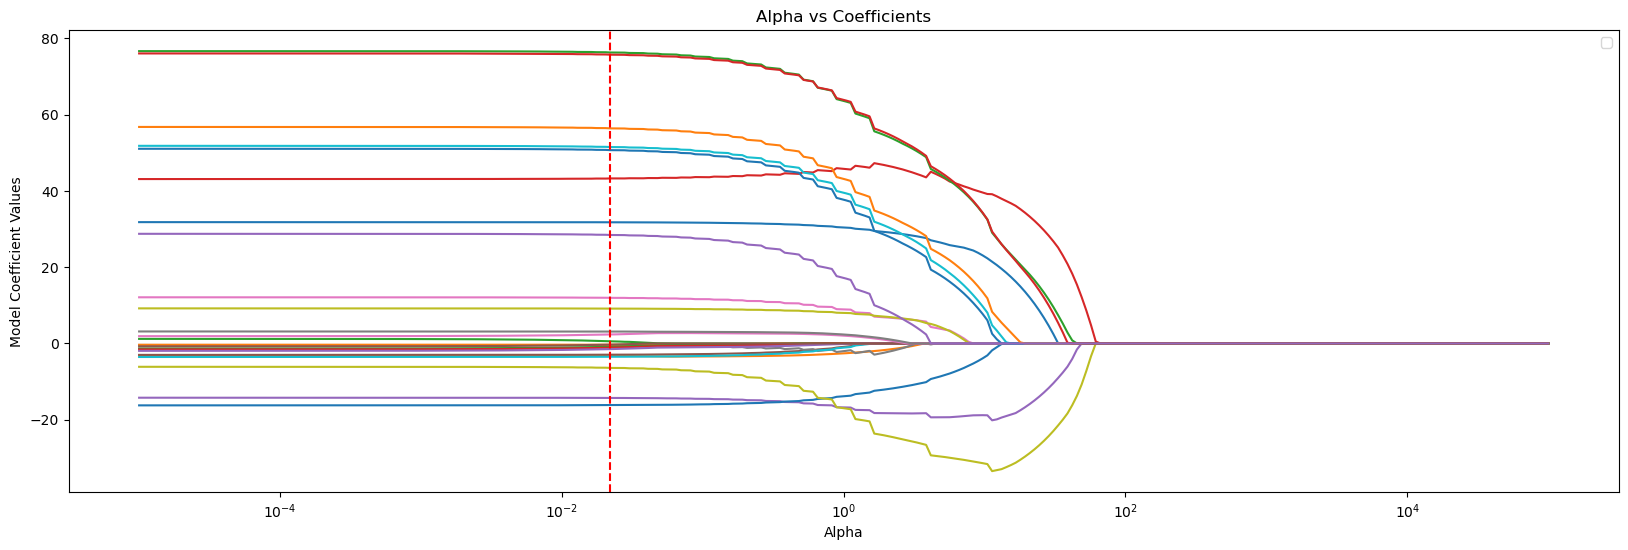

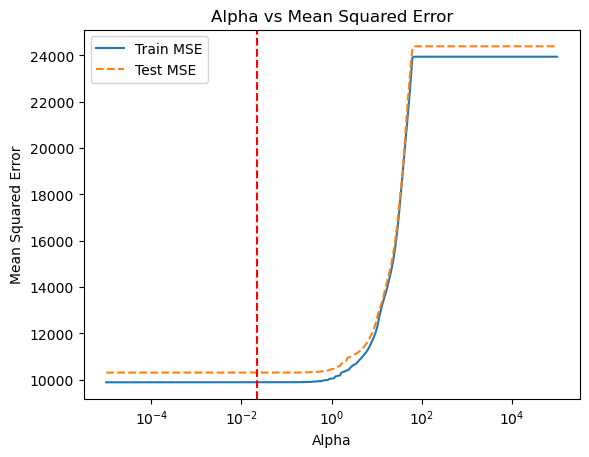

In [27]:
plt.figure(figsize=(20, 6))

# Plot alphas vs model_coefficients
for i in range(X_train_scaled.shape[1]):
    plt.plot(alphas, [coef[i] for coef in coefs_lasso])
plt.xscale('log')
plt.axvline(x=best_alpha_lasso, color='r', linestyle='--')
plt.xlabel('Alpha')
plt.ylabel('Model Coefficient Values')
plt.title('Alpha vs Coefficients')
plt.legend()
plt.show()

# Plot alphas vs MSE train and test
plt.plot(alphas, mses_train_lasso, linestyle="-",label='Train MSE')
plt.plot(alphas, mses_test_lasso, linestyle="--",label='Test MSE')
plt.axvline(x=best_alpha_lasso, color='r', linestyle='--')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Alpha vs Mean Squared Error')
plt.legend()
plt.show()

**Repeat your Lasso regression, but using `LassoCV`, and print out the best alpha for this model.**

In [28]:
# Pick the model type by initializing a model object
lassoCV = LassoCV(alphas=alphas, cv=10, max_iter=100000, tol=0.1)

# Step 2: Run the cross-validation model
lassoCV.fit(X_train_scaled, y_train)

y_pred_train_lassoCV = lassoCV.predict(X_train_scaled)
y_pred_test_lassoCV = lassoCV.predict(X_test_scaled)

r_squared_train_lassoCV = lassoCV.score(X_train_scaled,y_train)
r_squared_test_lassoCV = lassoCV.score(X_test_scaled,y_test)
mse_train_lassoCV = mean_squared_error(y_pred_train_lassoCV,y_train)
mse_test_lassoCV = mean_squared_error(y_pred_test_lassoCV,y_test)

# Printing results
print("Best alpha values: ", lassoCV.alpha_)
print("Best lassoCV Train R^2: ", r_squared_train_lassoCV)
print("Best lassoCV Test R^2: ", r_squared_test_lassoCV)
print("Best lassoCV Train MSE: ",mse_train_lassoCV)
print("Best lassoCV Test MSE: ", mse_test_lassoCV)

Best alpha values:  0.07578768863625922
Best lassoCV Train R^2:  0.5883347496771987
Best lassoCV Test R^2:  0.5801405562922294
Best lassoCV Train MSE:  9856.200273045524
Best lassoCV Test MSE:  10235.85308915076


**Compare alpha values from Lasso vs. LassoCV models**

In [ ]:
print('Lasso alpha: ', best_alpha_lasso)
print('LassoCV alpha: ', lassoCV.alpha_)

Lasso alpha:  0.022104546299710218
LassoCV alpha:  0.07578768863625922


**What does it mean to have a high alpha versus a low alpha? Compare the alphas for Ridge and Lasso.**

In [68]:
print('Ridge alpha: ', ridgeCV.alpha_)
print('Lasso alpha: ', lassoCV.alpha_)

Ridge alpha:  5.72236765935022
Lasso alpha:  0.07578768863625922


Alpha is higher for ridge compared to lasso. Higher alphas mean less complexity in the model, which can sometimes lead to underfitting. Lower alphas mean more complexity but are more prone to underfitting.

**Compare the results of the Ridge and Lasso regularizations you performed. Specifically look at the differences in the graphs and coefficients and how it relates to our understanding of these two methods.**

Ridge coefficients are bigger in magnitude and are all non-zero. Lasso coefficients are smaller and some are zero. Lasso allows some features to be eliminated which is why there are some zero coefficients. Ridge only allows them to get very small but not zero.

---
### Cross Validation



#### K-fold CV

In [29]:
# Initialize the KFold cross-validation method
cross_validation_kfold = KFold(n_splits=10, random_state=None, shuffle=False)

# Train polynomial regression models (degree 2 and 3) and evaluate using KFold.
r_squared_train_poly_kfold = []
mse_train_poly_kfold = []

for i in range(1, 4):

    # Step 0: Pre-process the features by converting them into a polynomial format
    polynomial_features = PolynomialFeatures(degree=i)
    X_train_polynomial = polynomial_features.fit_transform(X_train)
    X_test_polynomial = polynomial_features.fit_transform(X_test)

    # Step 1: Pick the model
    model_poly = LinearRegression()

    # Step 2: Train the model
    model_poly = model_poly.fit(X_train_polynomial, y_train)
    y_pred_test = model_poly.predict(X_test_polynomial)

    # Step 3: Evaluate the model using cross_val_score
    r_squared_train_poly  = model_poly.score(X_train_polynomial, y_train)
    mse_train_poly = -np.mean(cross_val_score(model_poly, X_train_polynomial, y_train, scoring="neg_mean_squared_error", cv=cross_validation_kfold))

    # Append the results
    r_squared_train_poly_kfold.append(r_squared_train_poly)
    mse_train_poly_kfold.append(mse_train_poly)
    
# Iterate over the results and print them
for i, (r_squared, mse) in enumerate(zip(r_squared_train_poly_kfold, mse_train_poly_kfold), start=2):
    print(f"Results for Polynomial Degree {i}:")
    print(f"  R-squared (Train): {r_squared:.4f}")
    print(f"  Average Cross-Validation MSE: {mse:.4f}")
    print()

Results for Polynomial Degree 2:
  R-squared (Train): 0.5884
  Average Cross-Validation MSE: 9890.6371

Results for Polynomial Degree 3:
  R-squared (Train): 0.7611
  Average Cross-Validation MSE: 8738592.1854

Results for Polynomial Degree 4:
  R-squared (Train): 0.8033
  Average Cross-Validation MSE: 5911.1315



#### LOOCV

**Compare the K-foldCV and LOOCV results. Did the MSE values change significantly? Any other differences you notice?**

MSE values did not change much for degree 2 but did change for the other degrees. R2 values were similar. Root MSE was the same for LOOCV for all 3 degrees but not Kfold; not sure what's going on there.

**Print out the best results (MSE and $R^2$) from your Lasso, Ridge, Linear, and Polynomial Regressions. Which has the best $R^2$ and which has the best MSE?**

In [40]:
print('Test R2s')
print('Linear: ', round(r_squared_test_linear,3))
print('Polynomial (degree 3): ',round(r_squared_test_poly3,3))
print('Ridge: ', round(r_squared_test_ridgeCV,3))
print('Lasso: ', round(r_squared_test_lassoCV,3))

print('Test MSEs')
print('Linear: ', round(mse_test_linear,0))
print('Polynomial (degree 3): ', round(mse_test_poly3,0))
print('Ridge: ', round(mse_test_ridge,0))
print('Lasso: ', round(mse_test_lasso,0))

Test R2s
Linear:  0.58
Polynomial (degree 3):  0.754
Ridge:  0.58
Lasso:  0.58
Test MSEs
Linear:  10238.0
Polynomial (degree 3):  5994.0
Ridge:  23403.0
Lasso:  24396.0


Best MSE: Polynomial degree 3
Best R2: Polynomial degree 3

---
### Interpretations

Imagine yourself in the role of a Data Analyst working for DC's Capital Bikeshare. Your primary responsibility is to generate predictions to help the company efficiently allocate bicycles in Washington, D.C., by gaining insights into the demand for their services.

**Which model would you recommend to DC's Capital Bikeshare to predict bike counts? Discuss and justify the key considerations you would take into account when selecting the most appropriate model for this task. Include factors related to data, model complexity, evaluation, interpretability, and more. Provide specific examples or scenarios to support your discussion.**

The polynomial degree 3 model performs best because it is the has the lowest MSE (5994) and highest R2 (0.754). The other 3 models perform similar to each other: they all have the same R2 (0.58) and the linear model has a better MSE (10238) compared to Ridge and Lasso (23403 and 24396 respectively). A reason the polynomial model might perform best is that bikeshare bike demand per hour is not linear and more closely resembles a polynomial curve, as there are different demand peaks throughout the day. Polynomial models are not as easy to interpret as linear models, but lower degree polynomials are easier to interpret compared to other more complicated models. Interpretability is important because simpler model are easier to explain and can be more helpful for making informed business decisions.

Some key takeaways:
- Commuting times have higher demand.
- Warmer months with less humidity are the best conditions for bikeshare rides.
- Demand is relatively steady throughout the week but does pick up some during the weekends.

Some additional considerations for future investigation:
- My analysis only went to degree 3 due to time constraints but it would be good to check higher degrees (4,5,6) as well.
- Reviewing the features and adjusting them might help improve the model. For example, it might be helpful to make the time frames larger than 3 hours.

**Think about the context of the problem with respect to DC's bikeshare program. Explain the potential impacts of this model on 1) policy, business, urban planning, environment, etc. and 2) specific groups of people. You should write a 1-2 paragraphs on your thoughts.**

This model could have implications for DC bikeshare by helping inform decisions on trends in membership, etc. Another example is using the data to predict days that ridership may be low and providing rider incentives to increase rides. 

Many cities have climate goals and this data is helpful for demonstrating progress toward those goals and as rationale for more funding.

Although location data is not avaialable in this dataset, you could imagine similar datasets that could be used in concert to demonstrate potential policy impacts. For example, it could also be used to justify further development in areas with high bike traffic or further investigation into how to support areas with lower traffic. It could be used by companies to inform transportation incentive policies as part of workplace wellness programs. The data could be combined with bus and subway data to see if further modifications to either system can be made to induce more participation through better integration. You could also compare trends in public transportation use with bikeshare use to see if usage patterns are complementary or substitutable. 

Depending on what data is available regarding casual and member demographics, you could combine this data with population data to see if there are populations with lower ridership. Some cities have added or are considering adding electric or other types of bikes that are more friendly for users with disabilties. This data could be used to provide justification for added use.

**Read this [article](https://builtin.com/data-science/bike-share-rebalancing), which discusses the complications and challenges of bike share rebalancing. In your own words, discuss the additional complexities mentioned in the article. How would you alter your prediction model to address these complexities?**

The relevancy period of historical data is very short, sometimes less than a day. Data is contextual; each time period (day, hour, etc.) has its own weather, day type (weekday, holiday). What happens in December is not necessarily relevant for what happens in January, and a January snowy weekday may be really different than a sunny January holiday. Trends change really rapidly. This can mean that a lot of the data is not as relelvant for predictions, except those situations that are very close in proximity to the current period. 

Changes to model could include somehow weighing more recent data more heavily. Maybe the same could be said for days with similar profiles (sunny hot weekday, rainy cold weekend, etc.). You would have to balance the need to have enough data to generate the model with ensuring that the data is relevant to the prediction.

---

### REFERENCES
1. https://pandas.pydata.org/docs/reference/
2. Seaborn documentation
3. Labs 2-5
4. https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/
5. https://medium.com/@oyebamijimicheal10/a-comprehensive-comparison-between-one-hot-and-ordinal-encoding-6f899c4f08b3
6. https://stackoverflow.com/questions/48042915/sort-a-pandas-dataframe-series-by-month-name
7. In-class exercises
8. https://stackoverflow.com/questions/23036866/scikit-learn-is-returning-coefficient-of-determination-r2-values-less-than-1
9. https://datascience.stackexchange.com/questions/39932/feature-scaling-both-training-and-test-data
10. https://neptune.ai/blog/cross-validation-in-machine-learning-how-to-do-it-right
11. https://towardsdatascience.com/interpreting-the-coefficients-of-linear-regression-cc31d4c6f235
12. https://medium.com/codex/exploratory-data-analysis-cyclistic-bike-share-analysis-case-study-1b1a00475a4f
13. Scikit learn documentation
14. https://tahera-firdose.medium.com/understanding-polynomial-regression-603eb25501d